## Iris Multi-class Classification with K-NN

In [11]:
## Step 1 — Load libraries and the Iris dataset
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [5]:
# Create DataFrame for easy viewing
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].map({i: name for i, name in enumerate(iris.target_names)})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
## Step 2 — Train/test split and feature scaling
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (120, 4)
Test shape: (30, 4)


In [21]:
## Step 3 — Train K-NN for k = 1, 3, 5, 7
ks = [1, 3, 5, 7]
results = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_scaled, y_train)
    train_acc = clf.score(X_train_scaled, y_train)
    test_acc = clf.score(X_test_scaled, y_test)
    results.append({'k': k, 'train_accuracy': train_acc, 'test_accuracy': test_acc})

results_df = pd.DataFrame(results)
results_df

,k,train_accuracy,test_accuracy
0,1,1.000000,0.966667
1,3,0.958333,0.933333
2,5,0.975000,0.933333
3,7,0.975000,0.966667


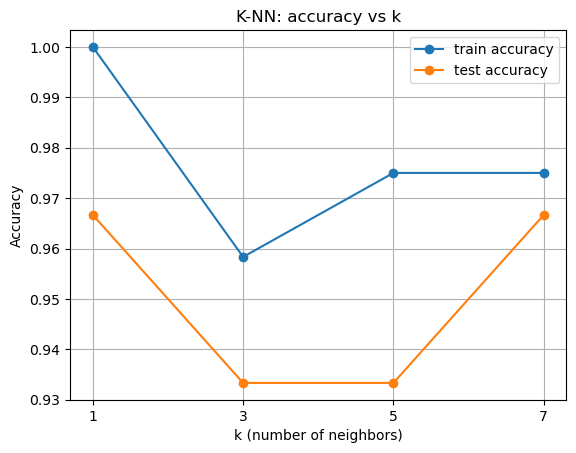

In [8]:
## Step 4 — Plot accuracy vs k
import matplotlib.pyplot as plt

plt.figure()
plt.plot(results_df['k'], results_df['train_accuracy'], marker='o', label='train accuracy')
plt.plot(results_df['k'], results_df['test_accuracy'], marker='o', label='test accuracy')
plt.title('K-NN: accuracy vs k')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.xticks(results_df['k'])
plt.legend()
plt.grid(True)
plt.show()

In [9]:
## Step 5 — Logistic Regression
logreg = LogisticRegression(max_iter=200, random_state=RANDOM_STATE)
logreg.fit(X_train_scaled, y_train)

logreg_train_acc = logreg.score(X_train_scaled, y_train)
logreg_test_acc = logreg.score(X_test_scaled, y_test)

print("Logistic Regression — train accuracy:", round(logreg_train_acc, 4))
print("Logistic Regression — test accuracy :", round(logreg_test_acc, 4))

Logistic Regression — train accuracy: 0.9583
Logistic Regression — test accuracy : 0.9333


Best K found: 1

K-NN classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Logistic Regression classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



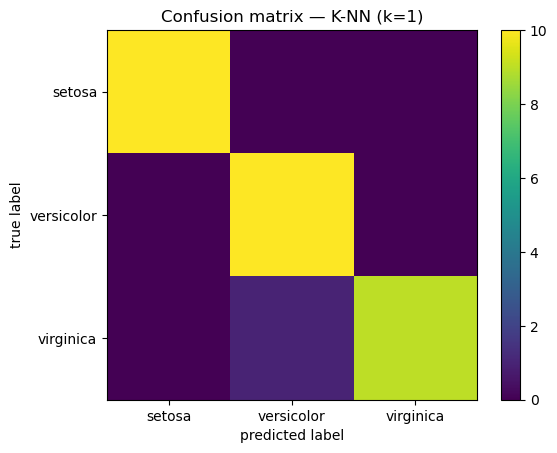

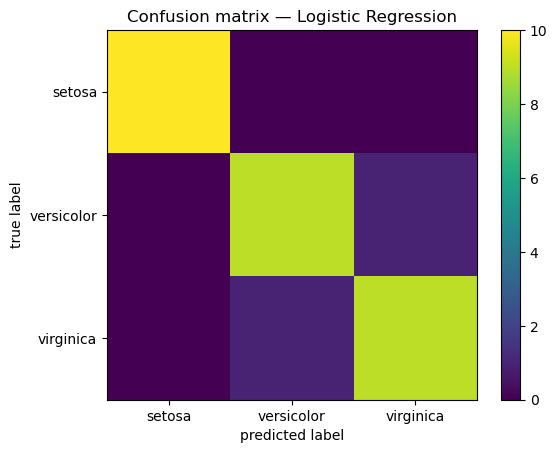

In [10]:
## Step 6 — Classification report and confusion matrix
# Best k by test accuracy
best_row = results_df.loc[results_df['test_accuracy'].idxmax()]
best_k = int(best_row['k'])

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_pred_knn = best_knn.predict(X_test_scaled)

print("Best K found:", best_k)
print("\nK-NN classification report:")
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))

# Logistic Regression predictions
y_pred_log = logreg.predict(X_test_scaled)
print("\nLogistic Regression classification report:")
print(classification_report(y_test, y_pred_log, target_names=iris.target_names))

# Confusion matrices
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure()
plt.imshow(cm_knn)
plt.title(f"Confusion matrix — K-NN (k={best_k})")
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
plt.xticks([0,1,2], iris.target_names)
plt.yticks([0,1,2], iris.target_names)
plt.show()

plt.figure()
plt.imshow(cm_log)
plt.title("Confusion matrix — Logistic Regression")
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
plt.xticks([0,1,2], iris.target_names)
plt.yticks([0,1,2], iris.target_names)
plt.show()

## Step 7 — Conclusion
'''- K-NN performed best with k=1 and k=7 (≈96.7% test accuracy).
- Logistic Regression reached ≈93.3% test accuracy.
- Both models perform well, but K-NN edges out slightly on this dataset.
- You can explore more k values or use cross-validation for a more robust comparison. '''

## Task Is Done 